# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news/news.csv


In [2]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Data Exploration & Cleaning

In [3]:
data=pd.read_csv('/kaggle/input/fake-news/news.csv')

In [4]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
data.isnull().sum()  #checking for null value

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
data.drop(['Unnamed: 0','title'],axis=1,inplace=True)

In [7]:
data['label']=data['label'].map({'REAL':0,'FAKE':1})

In [8]:
data.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,U.S. Secretary of State John F. Kerry said Mon...,0
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,It's primary day in New York and front-runners...,0


# Preprocessing

In [9]:
def preprocessing(text):
    text = text.strip()                         #Removes Extra White Spaces
#     text = text.lower()                         #lowercase
#     text = re.sub(r'[^a-zA-Z0-9\s]', '', text)     #Removes special characters
    
    return text

In [10]:
data['Clean']=data['text'].apply(preprocessing)

In [11]:
#split the dataset
X_train, x_test, y_train, y_test = train_test_split(data['Clean'], 
                                                    data['label'],test_size=0.2, 
                                                    random_state=42)

# Feature Extraction

### 1- Binary Encoding

In [12]:
# Initialize CountVectorizer with max_features
vectorizer = CountVectorizer(binary=True, max_features=800)  
# Fit and transform 
X_train_binary = vectorizer.fit_transform(X_train)
x_test_binary = vectorizer.transform(x_test)

# Convert to a DataFrame for better visualization
df_binary = pd.DataFrame(X_train_binary.toarray(), columns=vectorizer.get_feature_names_out())


df_binary.head()

,000,10,100,11,12,15,20,2008,2012,2013,...,would,wrong,wrote,year,years,yet,york,you,young,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,1,1,0,0,...,1,1,0,0,0,0,1,1,0,1
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### 2-Count


In [13]:
# Initialize CountVectorizer with max_features
vectorizer = CountVectorizer(max_features=500)  

# Fit and transform the 
X_train_count = vectorizer.fit_transform(X_train)
x_test_count = vectorizer.transform(x_test)
# Convert to a DataFrame for better visualization
df_train_count = pd.DataFrame(X_train_count.toarray(), columns=vectorizer.get_feature_names_out())

df_train_count.head()

,000,10,11,2012,2015,2016,able,about,according,across,...,working,world,would,wrote,year,years,yet,york,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,2,0,0,...,0,0,2,0,0,0,0,0,4,1
3,0,0,0,0,0,1,0,2,0,0,...,0,0,1,0,0,0,0,1,2,2
4,0,0,0,0,0,2,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0


### 3-TF-IDF

In [14]:
# Initialize TfidfVectorizer with max_features
vectorizer = TfidfVectorizer(max_features=10000)  

# Fit and transform the 
X_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf= vectorizer.transform(x_test)
# Convert to a DataFrame for better visualization
df_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

df_tfidf

,00,000,01,02,03,07,08,09,10,100,...,zervos,zika,zionism,zionist,zionists,zone,zones,zuckerberg,zulu,zulus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01757,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# build model

In [15]:
#SVM Accuracy
#Accuracy: 88.08% ==> binary
#Accuracy: 86.19% ==> count
#Accuracy: 65.82% ==> tfidf

In [16]:
#train the model
X = X_train_tfidf
y = y_train
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [17]:
#predict 
y_pred=clf.predict(x_test_tfidf)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 91.63%


In [18]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(x_test_tfidf)
clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [19]:
y_pred=clf.predict(X_test_scaled)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.66%


In [20]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[592  47]
 [ 46 582]]


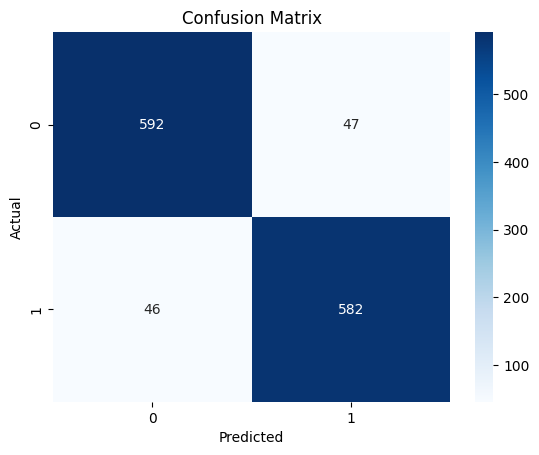

In [21]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       639
           1       0.93      0.93      0.93       628

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [24]:
from sklearn.preprocessing import StandardScaler

# Create a scaler instance
scaler = StandardScaler(with_mean=False)

# Fit the scaler to your training data
X_train_scaled = scaler.fit_transform(X_train_tfidf)

# You can now save the fitted scaler
import joblib
joblib.dump(scaler, 'fakenews_model_scaled.pkl')


['fakenews_model_scaled.pkl']